<a href="https://colab.research.google.com/github/HarikrishnanK9/Stock_Market/blob/main/Stock_Prediction_IRCTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.preprocessing .sequence import TimeseriesGenerator

In [2]:
df=pd.read_csv("/content/IRCTC.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,188.380005,190.770004,186.960007,188.869995,184.147079,8593275
1,2020-01-02,188.800003,188.800003,185.410004,186.080002,181.426834,3287655
2,2020-01-03,185.600006,188.699997,185.509995,186.279999,181.621826,4342850
3,2020-01-06,185.399994,185.410004,178.020004,178.889999,174.416626,3923670
4,2020-01-07,179.399994,184.300003,179.399994,181.479996,176.941849,3486795
...,...,...,...,...,...,...,...
991,2023-12-29,866.000000,895.000000,859.049988,887.500000,887.500000,10705182
992,2024-01-01,892.000000,916.849976,888.000000,891.849976,891.849976,9040913
993,2024-01-02,895.700012,903.299988,866.799988,886.200012,886.200012,5242381
994,2024-01-03,886.299988,910.000000,886.200012,899.250000,899.250000,6852189


In [3]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()

In [4]:
fig = go.Figure()
candlestick_trace = go.Candlestick(x=df['Date'],
                                   open=df['Open'],
                                   high=df['High'],
                                   low=df['Low'],
                                   close=df['Close'],
                                   increasing_line_color='green',  # Color for increasing candles
                                   decreasing_line_color='red',    # Color for decreasing candles
                                   showlegend=False,               # Hide legend for this trace
                                   name='Candlesticks')            # Name for the legend
fig.add_trace(candlestick_trace)

moving_average_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=20).mean(),
                                  mode='lines', name='20-day Moving Average', line=dict(color='blue'))
fig.add_trace(moving_average_trace)

fig.update_layout(title='Candlestick Chart with Trace Options',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()

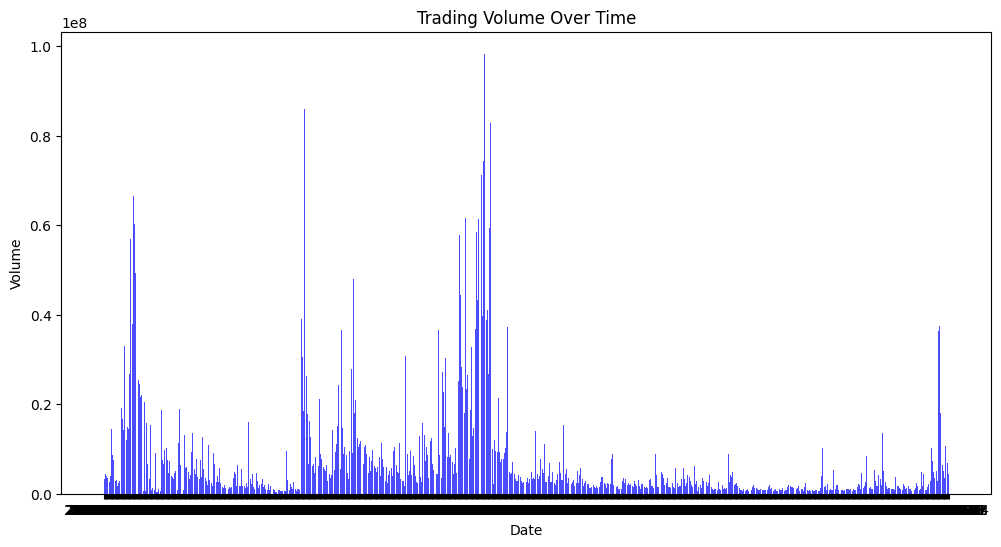

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


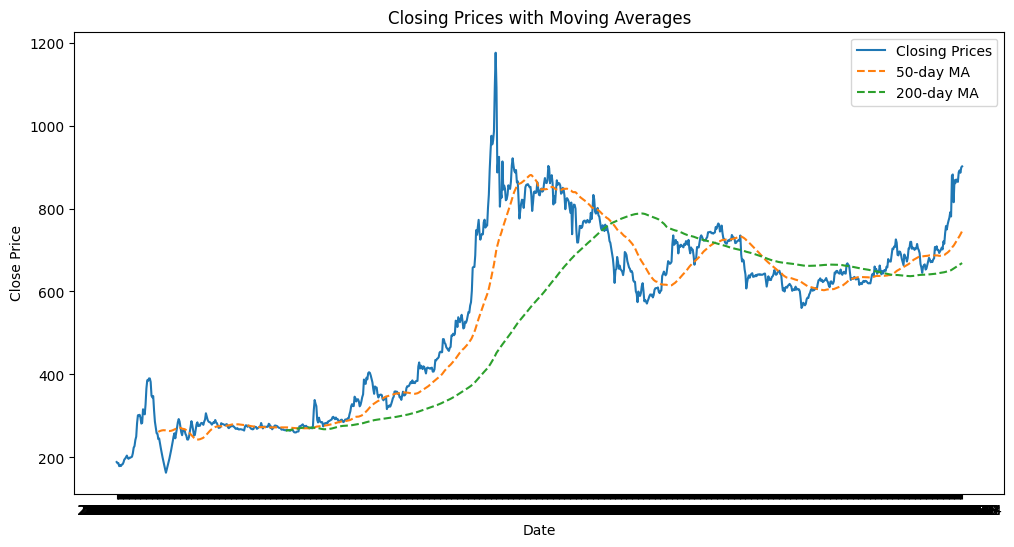

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Prices')
plt.plot(df['Date'], df['Close'].rolling(window=50).mean(), label='50-day MA', linestyle='--')
plt.plot(df['Date'], df['Close'].rolling(window=200).mean(), label='200-day MA', linestyle='--')
plt.title('Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [7]:
fig = go.Figure()
# Closing Prices trace
closing_prices_trace = go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Closing Prices')
fig.add_trace(closing_prices_trace)
# 50-day Moving Average trace
ma_50_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=50).mean(),
                         mode='lines', name='50-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_50_trace)
# 200-day Moving Average trace
ma_200_trace = go.Scatter(x=df['Date'], y=df['Close'].rolling(window=200).mean(),
                          mode='lines', name='200-day Moving Average', line=dict(dash='dash'))
fig.add_trace(ma_200_trace)
fig.update_layout(title='Closing Prices with Moving Averages',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  legend=dict(x=0.7, y=0.95))
fig.show()

<Figure size 1200x600 with 0 Axes>

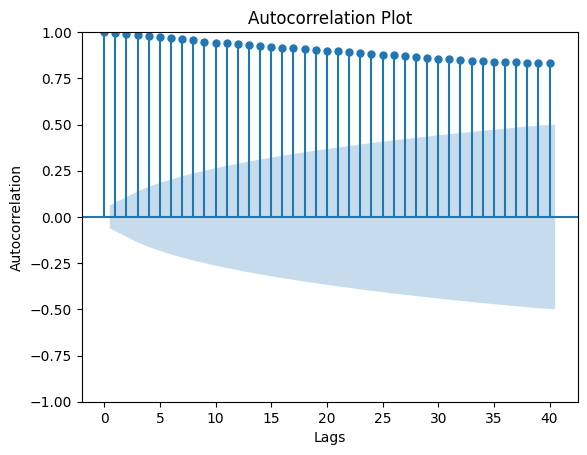

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=40)
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)


In [10]:
df=df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)


In [11]:
tracel = go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Date'
)

layout=go.Layout(
    title='KPIT:Date X Close',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig = go.Figure(data=[tracel],layout=layout)
fig.show()

In [12]:
close_data = df['Close'].values

In [13]:

close_data

array([ 188.869995,  186.080002,  186.279999,  178.889999,  181.479996,
        179.229996,  182.729996,  183.449997,  187.830002,  194.830002,
        197.080002,  200.729996,  204.369995,  198.669998,  196.550003,
        199.369995,  199.100006,  200.539993,  201.520004,  209.740005,
        223.279999,  227.429993,  242.059998,  250.169998,  282.529999,
        301.709991,  300.859985,  302.700012,  296.040009,  281.600006,
        283.049988,  316.070007,  311.480011,  303.730011,  327.720001,
        366.380005,  386.01001 ,  384.700012,  390.390015,  390.329987,
        381.880005,  348.76001 ,  344.649994,  347.859985,  313.079987,
        286.170013,  271.869995,  258.279999,  257.070007,  244.220001,
        245.550003,  233.279999,  221.619995,  210.539993,  200.020004,
        190.199997,  180.690002,  171.660004,  163.080002,  171.229996,
        179.789993,  187.160004,  196.509995,  206.330002,  216.639999,
        227.470001,  238.839996,  250.779999,  258.160004,  246.

In [14]:

close_data=close_data.reshape(-1,1)
close_data

array([[ 188.869995],
       [ 186.080002],
       [ 186.279999],
       [ 178.889999],
       [ 181.479996],
       [ 179.229996],
       [ 182.729996],
       [ 183.449997],
       [ 187.830002],
       [ 194.830002],
       [ 197.080002],
       [ 200.729996],
       [ 204.369995],
       [ 198.669998],
       [ 196.550003],
       [ 199.369995],
       [ 199.100006],
       [ 200.539993],
       [ 201.520004],
       [ 209.740005],
       [ 223.279999],
       [ 227.429993],
       [ 242.059998],
       [ 250.169998],
       [ 282.529999],
       [ 301.709991],
       [ 300.859985],
       [ 302.700012],
       [ 296.040009],
       [ 281.600006],
       [ 283.049988],
       [ 316.070007],
       [ 311.480011],
       [ 303.730011],
       [ 327.720001],
       [ 366.380005],
       [ 386.01001 ],
       [ 384.700012],
       [ 390.390015],
       [ 390.329987],
       [ 381.880005],
       [ 348.76001 ],
       [ 344.649994],
       [ 347.859985],
       [ 313.079987],
       [ 2

In [15]:

split_percentage=0.80
split=int(split_percentage * len(close_data))
split

796

In [19]:
close_train = close_data[:split]
close_test = close_data[split:]

In [20]:
print(len(close_train))
print(len(close_test))

796
200


In [21]:
date_train = df['Date'][:split]
date_test = df['Date'][split:]


In [22]:
print(len(date_train))
print(len(date_test))


796
200


In [23]:
look_back=15
train_generator = TimeseriesGenerator(close_train,close_train,length=look_back,batch_size=30)

In [24]:
test_generator = TimeseriesGenerator(close_test,close_test,length=look_back,batch_size=5)

In [25]:
model = Sequential()
model.add(
    LSTM(10, activation='relu', input_shape=(look_back, 1))
)
model.add(
    Dense(1)
)


In [26]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='mse')

In [27]:

model.fit(train_generator,epochs=100)

Epoch 1/100
27/27 [==============================] - 7s 11ms/step - loss: 6088629.5000
Epoch 2/100
27/27 [==============================] - 0s 15ms/step - loss: 3620451.0000
Epoch 3/100
27/27 [==============================] - 0s 16ms/step - loss: 1675304.1250
Epoch 4/100
27/27 [==============================] - 0s 14ms/step - loss: 809969.2500
Epoch 5/100
27/27 [==============================] - 0s 18ms/step - loss: 218656.5156
Epoch 6/100
27/27 [==============================] - 0s 15ms/step - loss: 233404.1875
Epoch 7/100
27/27 [==============================] - 1s 18ms/step - loss: 205132.3594
Epoch 8/100
27/27 [==============================] - 0s 9ms/step - loss: 87729.1797
Epoch 9/100
27/27 [==============================] - 0s 10ms/step - loss: 63296.7773
Epoch 10/100
27/27 [==============================] - 0s 9ms/step - loss: 45895.8008
Epoch 11/100
27/27 [==============================] - 0s 12ms/step - loss: 29988.3262
Epoch 12/100
27/27 [==============================] - 1

In [28]:
model.save('elxsi.keras')

In [29]:
prediction = model.predict_generator(test_generator)

<ipython-input-29-342c80f366ab>:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [30]:
prediction

array([[583.99084],
       [581.7082 ],
       [578.4423 ],
       [579.24475],
       [577.3396 ],
       [577.9047 ],
       [578.23083],
       [580.74384],
       [586.9295 ],
       [593.4474 ],
       [594.1868 ],
       [595.5931 ],
       [599.1116 ],
       [603.3405 ],
       [605.0305 ],
       [606.8405 ],
       [610.12134],
       [613.3953 ],
       [615.4576 ],
       [617.52563],
       [618.804  ],
       [619.82214],
       [622.48456],
       [624.0971 ],
       [626.8591 ],
       [627.4464 ],
       [628.64685],
       [629.2059 ],
       [626.42975],
       [623.6169 ],
       [623.6238 ],
       [622.6746 ],
       [623.33044],
       [621.78467],
       [623.03595],
       [624.99176],
       [626.78094],
       [629.12085],
       [630.79114],
       [634.0152 ],
       [636.0177 ],
       [639.3453 ],
       [643.0482 ],
       [643.84625],
       [644.4183 ],
       [647.46344],
       [648.29987],
       [647.9103 ],
       [644.8271 ],
       [648.073  ],


In [31]:
close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction=prediction.flatten()

In [32]:
prediction


array([583.99084, 581.7082 , 578.4423 , 579.24475, 577.3396 , 577.9047 ,
       578.23083, 580.74384, 586.9295 , 593.4474 , 594.1868 , 595.5931 ,
       599.1116 , 603.3405 , 605.0305 , 606.8405 , 610.12134, 613.3953 ,
       615.4576 , 617.52563, 618.804  , 619.82214, 622.48456, 624.0971 ,
       626.8591 , 627.4464 , 628.64685, 629.2059 , 626.42975, 623.6169 ,
       623.6238 , 622.6746 , 623.33044, 621.78467, 623.03595, 624.99176,
       626.78094, 629.12085, 630.79114, 634.0152 , 636.0177 , 639.3453 ,
       643.0482 , 643.84625, 644.4183 , 647.46344, 648.29987, 647.9103 ,
       644.8271 , 648.073  , 649.3966 , 651.20996, 653.4995 , 653.2236 ,
       650.97015, 647.2526 , 647.3854 , 647.67126, 645.1623 , 642.46027,
       641.40765, 639.8919 , 634.5673 , 632.1099 , 628.9746 , 625.8491 ,
       627.1635 , 628.01825, 625.2069 , 625.44073, 624.756  , 623.51996,
       623.64014, 623.9144 , 622.5657 , 621.4451 , 621.09644, 623.9185 ,
       623.44946, 625.5133 , 628.56067, 629.0199 , 

In [33]:
tracel2 = go.Scatter(
    x=date_train,
    y=close_train,
    mode='lines',
    name='Date'
)

tracel3 = go.Scatter(
    x=date_test,
    y=close_test,
    mode='lines',
    name='test data'
)

tracel4 = go.Scatter(
    x=date_test,
    y=prediction,
    mode = 'lines',
    name='prediction'
)
layout = go.Layout(
    title='TATA ELXSI Stock',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig = go.Figure(data=[tracel2,tracel3,tracel4],layout=layout)
fig.show()